# importing necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
#from sklearn.model_selection import train_test_split # split between train and test data
#from sklearn.model_selection import cross_val_score # calculate cross validation score and under the roc curve socring
#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
#from sklearn.linear_model import LogisticRegression, Ridge
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import tensorflow as tf #pip install tensorflow
#import keras
%matplotlib inline

### ignoring the errors

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
df = pd.read_csv(r"C:\Users\USER\ML Datasets\class22\Campaign details.csv")
df.sample(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3842,22,student,single,secondary,no,216,no,no,cellular,6,aug,178,1,179,2,success,yes
4903,41,management,married,primary,no,5310,yes,no,cellular,17,nov,984,1,-1,0,unknown,yes
4939,24,technician,single,secondary,no,598,no,no,cellular,12,may,762,1,182,2,success,yes
9992,48,blue-collar,married,secondary,no,741,yes,no,cellular,16,apr,227,1,-1,0,unknown,no
621,58,management,divorced,secondary,no,3161,no,no,telephone,30,jul,542,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,54,blue-collar,married,primary,no,1311,no,no,telephone,15,oct,485,3,184,3,failure,yes
10524,28,admin.,married,secondary,no,170,yes,yes,unknown,21,may,492,1,-1,0,unknown,no
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown,yes
4289,27,student,single,secondary,no,213,no,no,cellular,27,mar,378,1,-1,0,unknown,yes


In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
# describe catagorical numerical columns
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [8]:
# checking the unique items in catagorical features
for col in df.select_dtypes(include='object').columns:
    print(col,'=',df[col].unique())
    

job = ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital = ['married' 'single' 'divorced']
education = ['secondary' 'tertiary' 'primary' 'unknown']
default = ['no' 'yes']
housing = ['yes' 'no']
loan = ['no' 'yes']
contact = ['unknown' 'cellular' 'telephone']
month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome = ['unknown' 'other' 'failure' 'success']
deposit = ['yes' 'no']


In [9]:
df[df.deposit=='no'].shape

(5873, 17)

In [10]:
df[df.deposit=='yes'].shape

(5289, 17)

# Exploratory Data Analysis

#### Steps followed:
- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features
- Find Pair Plot
- Check the Data set is balanced or not based on target values in classification

**1. Find Unwanted Columns**

**Take-away**:
- these is no unwanted column present in given dataset to remove

**2. Find Missing Values**

In [11]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


**Take-away**:
- No missing value found

**3. Find Features with One Value**

In [12]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


**Take-away**:
- No feature with only one value

**4. Explore the Categorical Features**

In [13]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,df[feature].nunique()))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**Take-away**:
- there are 9 categorical features
- feature job and month has highest number of categorical values

**5. Find Categorical Feature Distribution**

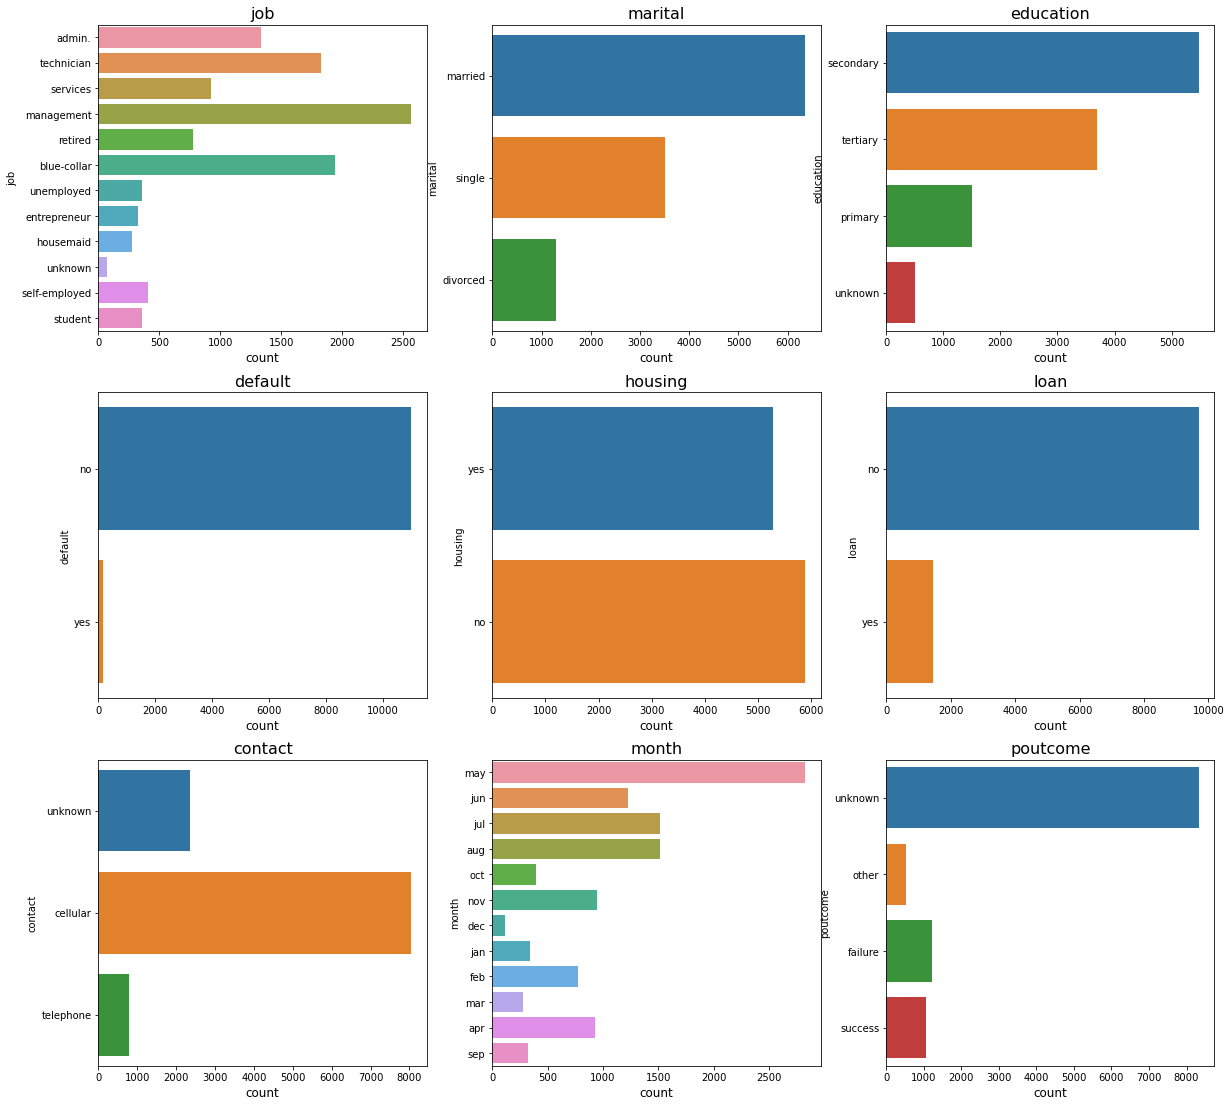

In [15]:
#check count based on categorical features
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    plt.title(categorical_feature,fontsize=16)
    plt.xlabel('frequency',fontsize=12)
    
    sns.countplot(y=categorical_feature,data=df)
    plotnumber+=1
plt.show()

**Take-away**:
- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

**6. Relationship between Categorical Features and Label**

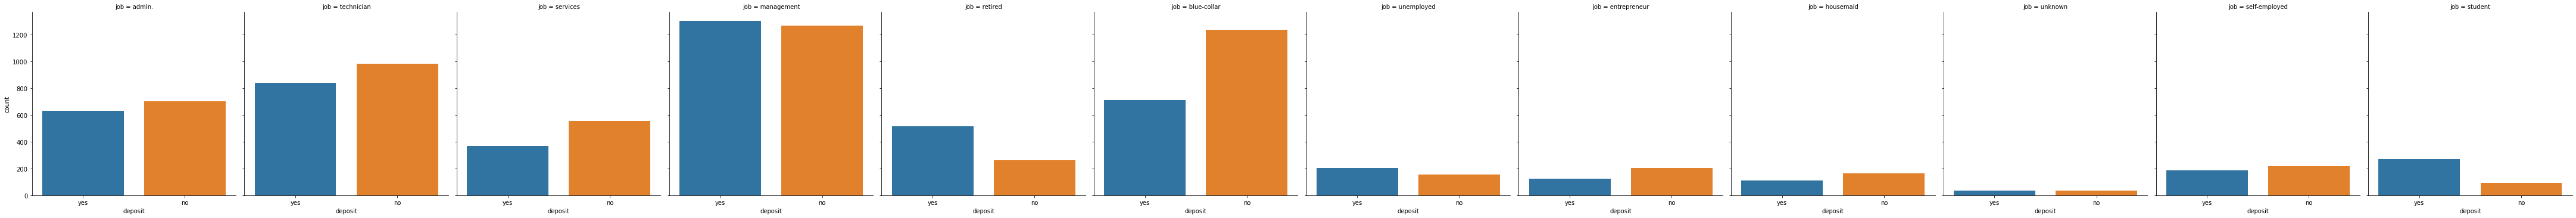

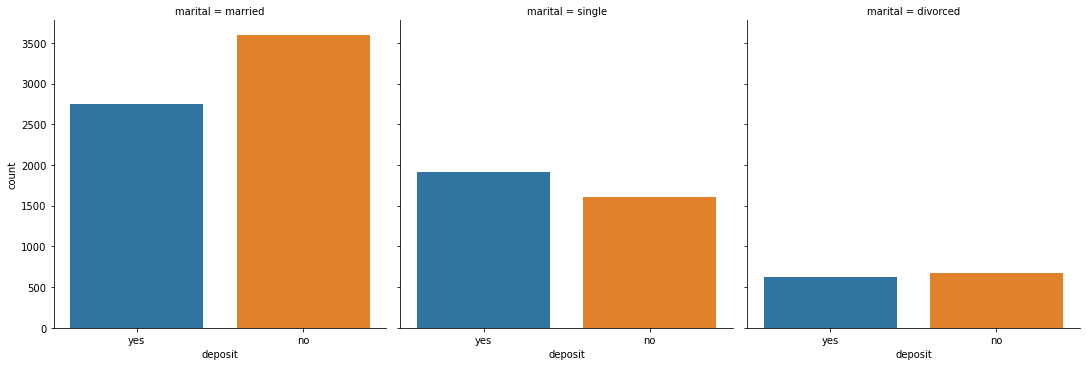

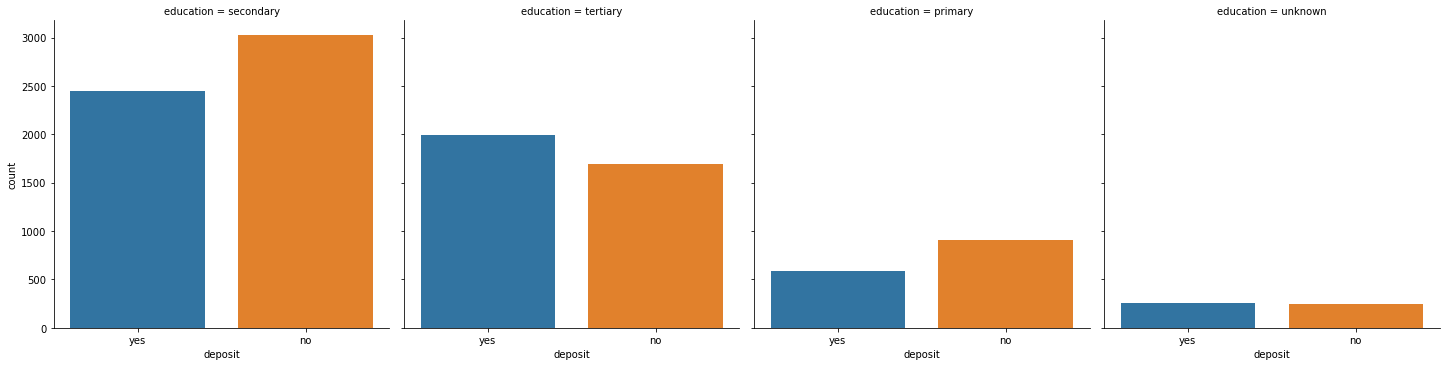

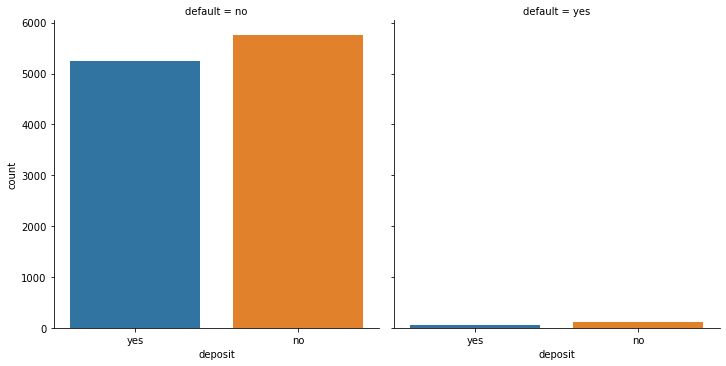

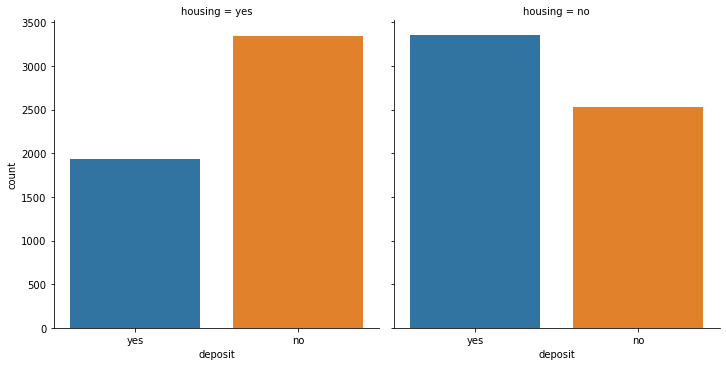

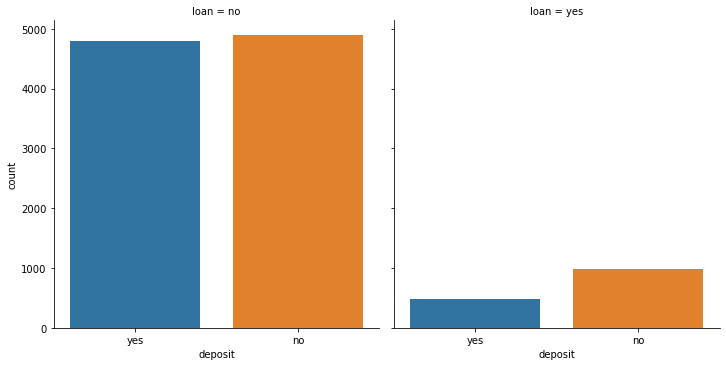

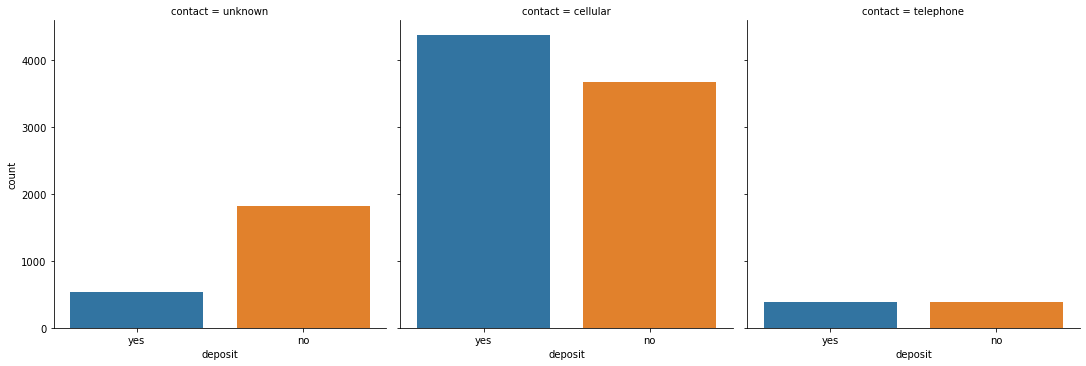

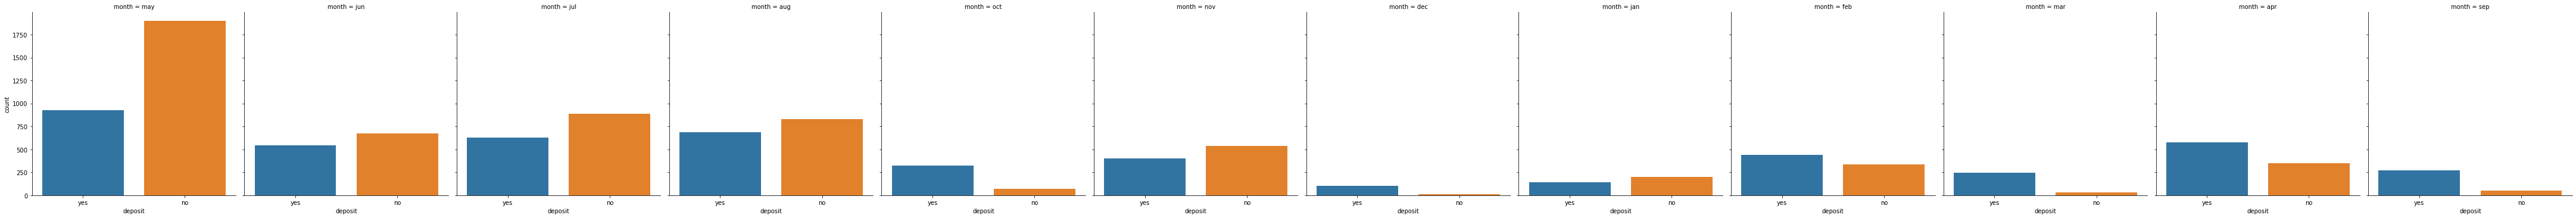

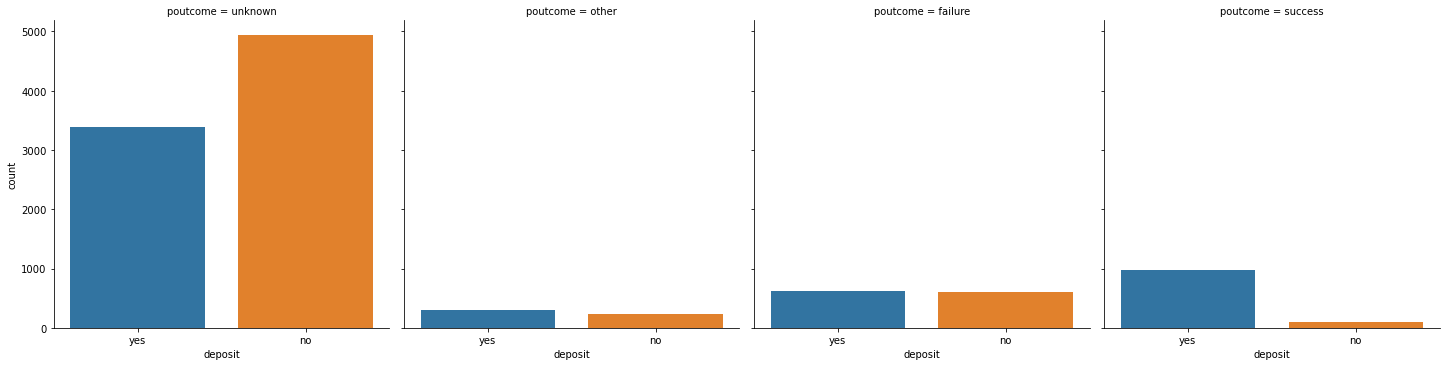

In [16]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [17]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

**Take-away**:
- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

**7. Explore the Numerical Features**

In [18]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


**Take-away**:
- there are 7 numerical features

**8. Find Discrete Numerical Features**

In [19]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Take-away**:
- there is no Discrete Variables in give dataset

**9. Relation between Discrete numerical Features and Labels**
- No discrete found


**10. Find Continous Numerical Features**

In [20]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


**Take-away**:
- there are 7 continuous numerical features

**11. Distribution of Continous Numerical Features**

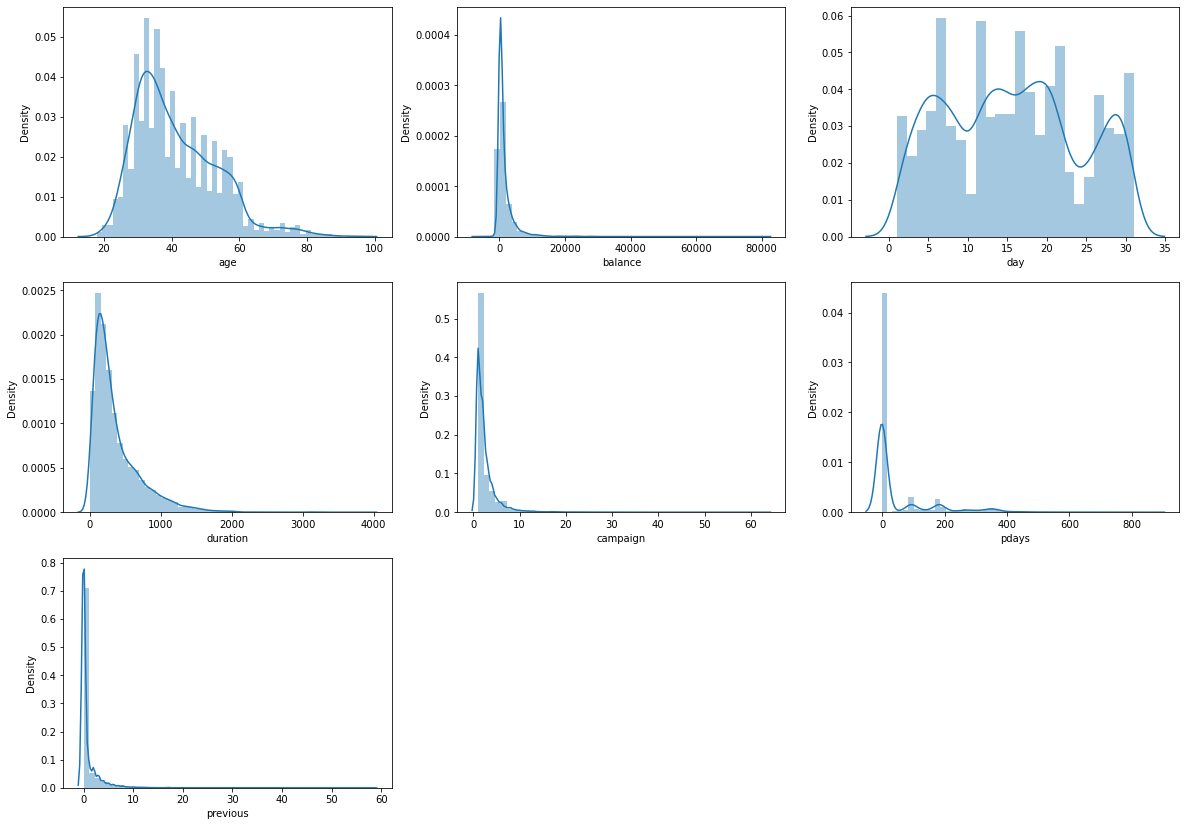

In [21]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Take-away**: 
- it seems age, days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

**12. Relation between Continous numerical Features and Labels**

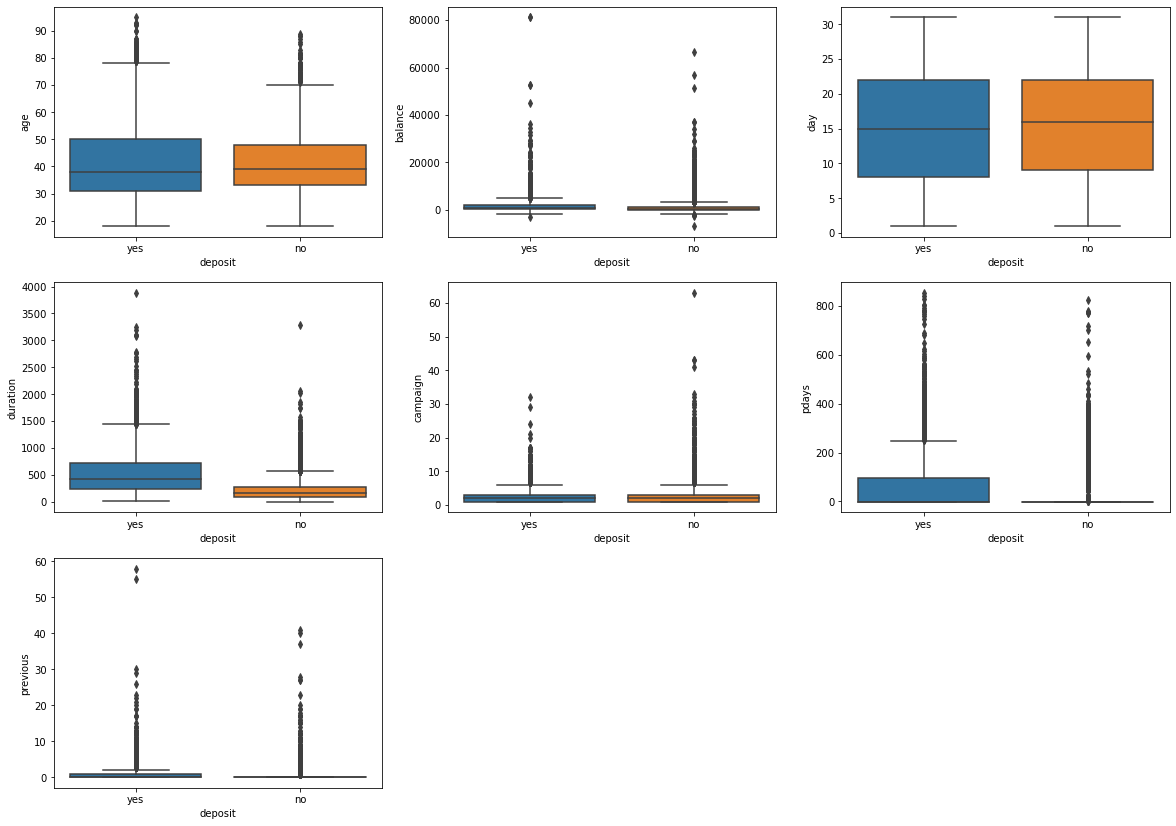

In [22]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel('deposit')
    plotnumber+=1
plt.show()

**Take-away**:
- client shows interest on deposit who had discussion for longer duration

**13. Find Outliers in numerical features**

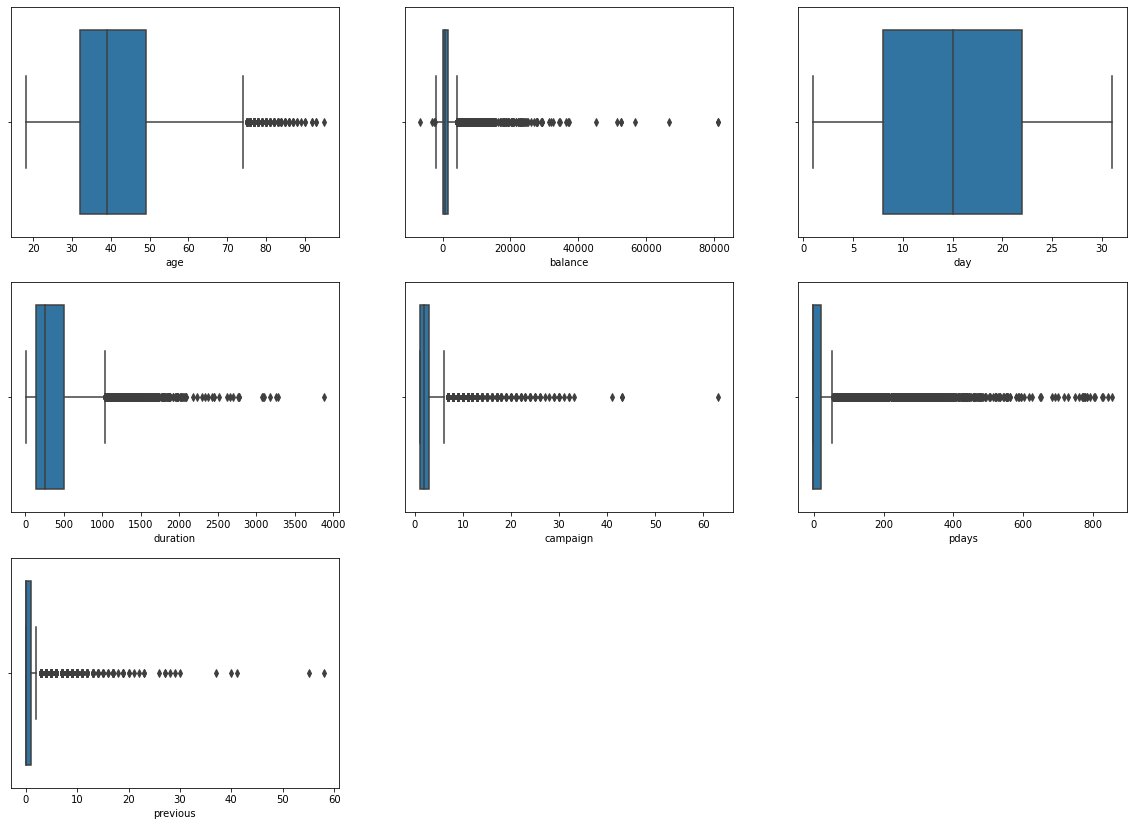

In [23]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Take-away**:
- age, balance, duration, compaign, pdays and previous has some outliers

**14. Explore the Correlation between numerical features**

<AxesSubplot:>

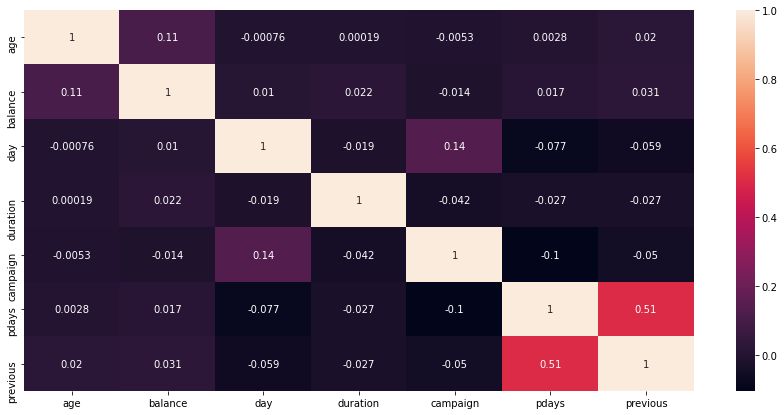

In [24]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Take-away**: 
- it seems no feature is heavily correlated with other features

**15. Check the Data set is balanced or not based on target values in classification**

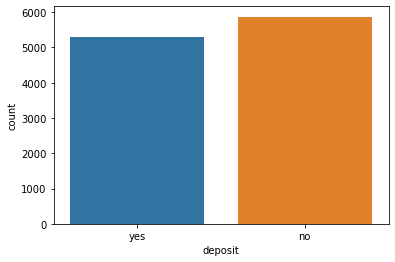

In [25]:
#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()

In [26]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

# Feature Engineering

### Steps:
- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

As per Exploratory Data Analysis EDA, 
- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [27]:
df2=df.copy()

In [28]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [29]:
df2.shape

(11162, 17)

In [30]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [31]:
df2.drop(['default'],axis=1, inplace=True)

In [32]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [33]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [34]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [35]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [36]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [37]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [38]:
df3 = df2[df2['campaign'] < 33] #we can see that it has outliers above 33

In [39]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [40]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [41]:
df4 = df3[df3['previous'] < 31] #it has outliers above 31

#### Handling catagorical feature

In [42]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [43]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [44]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [45]:
df4.index
df4.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'housing_new', 'loan_new', 'deposit_new'],
      dtype='object')

# Feature scaling of numerical features

In [ ]:
numerical_features

In [ ]:
feature_to_scale=[]
for i in numerical_features:
    if i=='pdays':             # because 'pdays' was dropped
        continue
    else:
        feature_to_scale.append(i)

In [ ]:
feature_to_scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = df4.copy()
col_names = feature_to_scale
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, index=df4.index, columns=df4.columns)

In [ ]:
scaled_features_df

In [ ]:
#df4 = pd.DataFrame(df4, columns = ['Column_A','Column_B','Column_C'])

# Split Dataset into Training set and Test set

In [46]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [47]:
len(X_train)

8364

In [48]:
len(X_test)

2788

# Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

X_test = sc.transform(X_test)

# Model Fitting

# 1. SVM

***Model building and fitting***

In [168]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model_1 = svm.SVC(kernel='linear',C=300, gamma=0.001,random_state=20) # Linear Kernel
#model = svm.SVC(kernel='poly') 

#Train the model using the training sets
model_1.fit(X_train, y_train)

SVC(C=300, gamma=0.001, kernel='linear', random_state=20)

***Model evaluation***

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

#Predict the response for test dataset
y_pred = model_1.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

def pred(model):
    yp = model.predict(X_test)
    y_pred = []
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return(y_pred)

print(classification_report(y_test,y_pred))

Accuracy: 0.8199426111908178
Precision: 0.8205521472392638
Recall: 0.7997010463378177
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1450
           1       0.82      0.80      0.81      1338

    accuracy                           0.82      2788
   macro avg       0.82      0.82      0.82      2788
weighted avg       0.82      0.82      0.82      2788



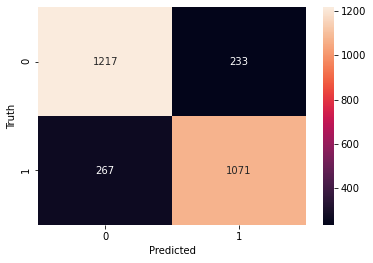

In [135]:
def confusionmatrix(model):
    cm = sklearn.metrics.confusion_matrix(y_test, np.rint(y_pred))

    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
confusionmatrix(model_1)    

# 2. Logistic regression

**Model Building**

In [56]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [136]:
y_pred = model_2.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.8145624103299857
Precision: 0.8229740361919748
Recall: 0.7817638266068759
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1450
           1       0.82      0.78      0.80      1338

    accuracy                           0.81      2788
   macro avg       0.82      0.81      0.81      2788
weighted avg       0.81      0.81      0.81      2788



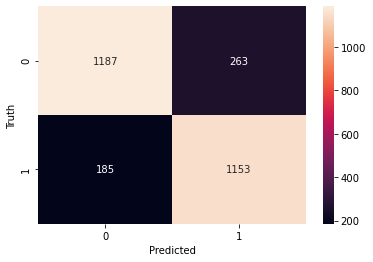

In [147]:
confusionmatrix(model_2)   

# 3. K-nearest neighbors

**Model Building**

In [120]:
from sklearn.neighbors import KNeighborsClassifier
model_3_test = KNeighborsClassifier(n_neighbors = 3,algorithm = 'kd_tree',p=1)
model_3_test.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, p=1)

**Model Evaluation**

In [121]:
y_pred = model_3_test.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7625538020086083


**Hypertuning model parameters using GridSearchCV**

In [122]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
model_3_pro = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 24)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(model_3_pro, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])})

In [123]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 21}

**Model building with n_neighbors=21**

In [174]:
model_3 = KNeighborsClassifier(n_neighbors = 21,algorithm = 'kd_tree',p=1)
model_3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=21, p=1)

**Model Evaluation phase-2**

In [175]:
y_pred = model_3.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.766857962697274
Precision: 0.8202979515828678
Recall: 0.6584454409566517
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1450
           1       0.82      0.66      0.73      1338

    accuracy                           0.77      2788
   macro avg       0.78      0.76      0.76      2788
weighted avg       0.78      0.77      0.76      2788



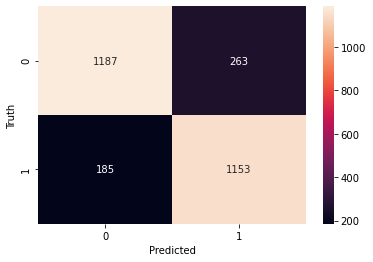

In [148]:
confusionmatrix(model_3) 

# 4. Decision Tree

**Model Building**

In [96]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
model_4.fit(X_train,y_train)

DecisionTreeClassifier()

**Model Evaluation**

In [139]:
y_pred = model_4.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.7697274031563845
Precision: 0.7689335394126738
Recall: 0.7436472346786248
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1450
           1       0.77      0.74      0.76      1338

    accuracy                           0.77      2788
   macro avg       0.77      0.77      0.77      2788
weighted avg       0.77      0.77      0.77      2788



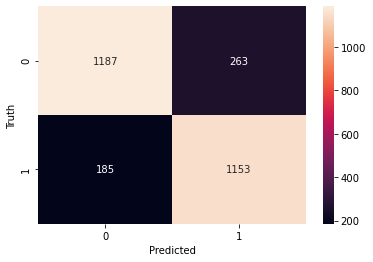

In [149]:
confusionmatrix(model_4) 

# 5. Random Forest

**Model Building**

In [178]:
from sklearn.ensemble import RandomForestClassifier
model_5=RandomForestClassifier(n_estimators=250,criterion='entropy',max_features=7)
model_5.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=7, n_estimators=250)

**Model Evaluation**

In [179]:
y_pred = model_5.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.8486370157819225
Precision: 0.824822695035461
Recall: 0.8692077727952168
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1450
           1       0.82      0.87      0.85      1338

    accuracy                           0.85      2788
   macro avg       0.85      0.85      0.85      2788
weighted avg       0.85      0.85      0.85      2788



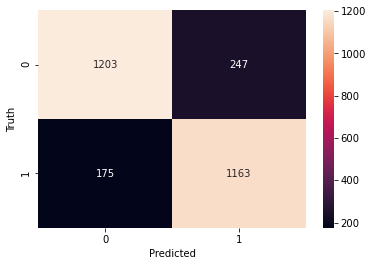

In [180]:
confusionmatrix(model_5) 

# 6. Neural Network

**Model Building**

In [184]:
from keras.models import Sequential
from keras.layers import Dense
model_6 = Sequential()
model_6.add(Dense(20, input_dim=40, activation='relu'))
#model_6.add(Dense(15, activation='relu'))
#model_6.add(Dense(15, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

# compile the keras model
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_6.fit(X_train,y_train,validation_split=.2, epochs=100)

Epoch 1/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6254 - val_loss: 0.5011 - val_accuracy: 0.7717
Epoch 2/100
210/210 [==============================] - 0s 647us/step - loss: 0.4745 - accuracy: 0.7901 - val_loss: 0.4329 - val_accuracy: 0.8111
Epoch 3/100
210/210 [==============================] - 0s 627us/step - loss: 0.4203 - accuracy: 0.8197 - val_loss: 0.4039 - val_accuracy: 0.8207
Epoch 4/100
210/210 [==============================] - 0s 632us/step - loss: 0.3886 - accuracy: 0.8357 - val_loss: 0.3942 - val_accuracy: 0.8201
Epoch 5/100
210/210 [==============================] - 0s 618us/step - loss: 0.3750 - accuracy: 0.8366 - val_loss: 0.3875 - val_accuracy: 0.8237
Epoch 6/100
210/210 [==============================] - 0s 608us/step - loss: 0.3590 - accuracy: 0.8388 - val_loss: 0.3858 - val_accuracy: 0.8302
Epoch 7/100
210/210 [==============================] - 0s 618us/step - loss: 0.3775 - accuracy: 0.8404 - val_loss: 0.3821 - val_accu

**Model Evaluation**

In [185]:
accuracy = model_6.evaluate(X_test, y_test)


88/88 [==============================] - 0s 334us/step - loss: 0.4092 - accuracy: 0.8350


confusionmatrix(model_6)

In [186]:
y_pred = pred(model_6)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1450
           1       0.82      0.84      0.83      1338

    accuracy                           0.84      2788
   macro avg       0.83      0.84      0.83      2788
weighted avg       0.84      0.84      0.84      2788



# Comparative Study

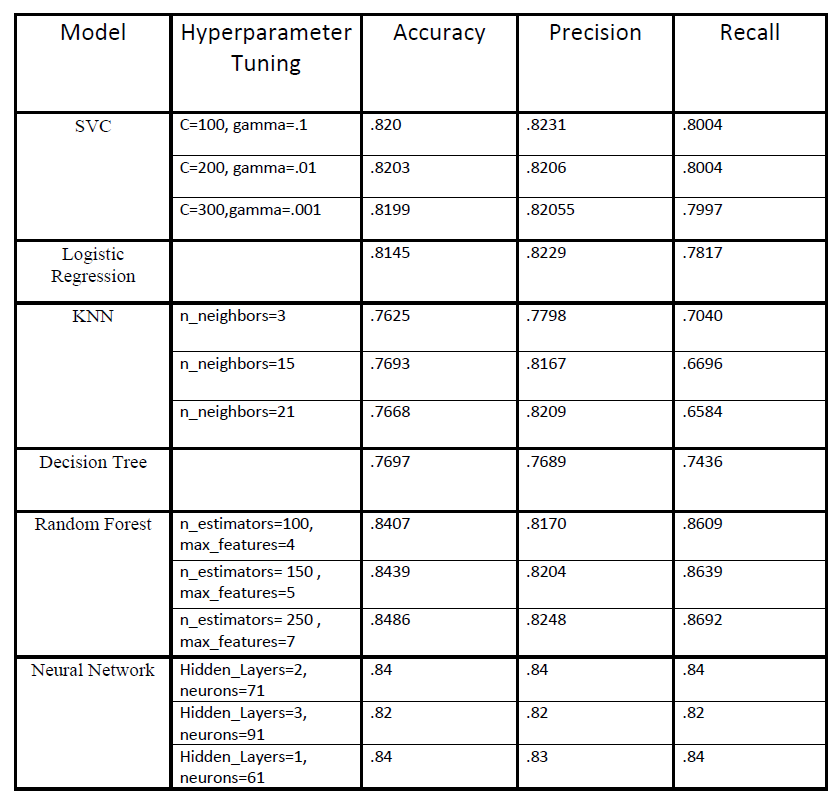

# Observation:

**we can see that both Random Forest and Neural Network gives the best accuracy for the given problem**